# 有限马尔科夫决策过程

# 1. 强化学习的基本框架


# 1.1 agent-environment interface

强化学习的基本框架可以用智能体与环境的接口表示，如下图所示：

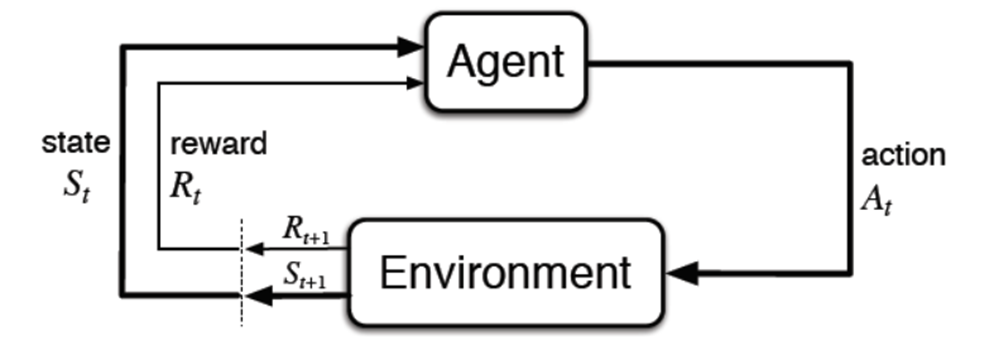

$$图1 强化学习基本框架$$

如上图所示，在强化学习的基本框架中包含一个智能体(agent)和一个它与之交互的环境(Envrionment)。智能体基于当前环境状态做出决策（决定采取什么行动）；该行动会导致环境状态发生变化，并且环境会根据行动以及其导致的状态变化给智能体反馈一个（即时）奖励，并呈现给智能体新的状态。

智能体与环境之间的分界线是一个非常微妙的问题，详细参见[Sutton-Book]的描述。[Sutton-Book]The general rule we follow is that anything that cannot be changed arbitrarily by
the agent is considered to be outside of it and thus part of its environment.


# 1.2 学习什么？ 

在以上强化学习的基本框架中，学习的对象是什么呢？换句话说学习体现在哪儿呢？

体现在智能体需要为了满足某个预设的目标而学习如何做出好的决策。在强化学习中智能体做决策的机制或者规则被称为策略(policy)，通常用$\pi$表示。

归根结底，强化学习要解决的问题是决策的问题。与之相对的是，监督学习、深度学习等解决的是感知的问题。人工智能的终极目的是通过感知进行智能决策。所以，将今年发展起来的深度学习技术与强化学习算法结合起来而产生的深度强化学习或许是实现人工智能终极目标的一个很有前景的方法。


# 1.3 学习的目标是什么？

虽然在每一次(可以理解为一个time step)智能体采取一次行动，都会得到环境反馈的一个（即时）奖励，但是强化学习的目标并不是单纯的即时奖励最大化，而是有一个更长远的目标，即总体奖励的最大化。对于一个有限游戏，一次游戏称为一个episode(回合)，就是指这一个回合的终极目标，比如说，一局棋的胜负，一场拳击比赛的胜负，一场战役的胜负。对于无限游戏，这个解释起来稍微有点麻烦，但是现实世界里碰到的问题绝大多数都是有限游戏，无限游戏一般也可以某种程度上近似为有限游戏来处理(这样的理解对吗?)

# 1.4 如何求解呢?

在强化学习问题中，我们不是像监督学习中那样明确地“教”智能体如果做某事，而只是通过环境反馈给它的奖励以及一个终极目标，然后让智能体自己去从与环境的交互中学习如何做决策。

那这样的问题如何求解呢？

我们知道，要严格地求解一个问题最好的方法是借助数学工具，这就要求首先要把一个问题以数学的方式表达(formulate it  mathematically，或者说问题的数学形式化)。

这就到了马尔可夫决策过程登场的时候了。马尔科夫决策过程就是用于对强化学习进行形式化处理的最经典、最重要的数学模型。MDP既涉及到评估式反馈(evaluative feedback),如bandit-game中所示，也涉及到关联性方面(associative aspect)，即在不同的情境(situation)下选择不同的行动。MDP是序贯决策（sequential decision making）的一个经典的形式化描述(formalization)。在序贯决策过程中，行动不仅仅影响到即时的奖励，而且还会通过未来的奖励影响到后续的情境或者状态。因此，MDP涉及到延迟奖励(delayed reward)，进而会牵涉到在即时奖励和延迟奖励之间的折衷。在bandit问题中，我们只需要评估每个行动的价值$q^* (a)$，而在MDP中则需要进一步评估在每个状态下各行动的价值$q^* (s,a)$，或者评估假定在每个状态都能做最优行动选择条件下的状态价值$v^* (s)$。这些与状态相关的量是给单个行动选择的长期效应进行打分(assigning credit)的基本要素。


# 2. 马尔科夫决策过程基础

Markov决策过程是强化学习的最经典、最重要的数学框架模型。那什么是马尔科夫决策过程呢？


## 2.1 What is MDP?


顾名思义，马尔科夫决策过程是引入了“决策”这个要素的马尔科夫过程。关于马尔科夫过程过程的介绍参见“https://chenxiaoyuan.blog.csdn.net/article/details/122378933”

在马尔科夫过程中，只有状态之间的转移，没有出现决策或者行动（行动即是决策的结果，要采取行动就需要做决策以决定从多种可能的行动之间选择哪个行动。在强化学习语境下，决策和行动是紧密相关联的）。向马尔科夫过程加入决策（行动）这个要素，就变成了马尔科夫决策过程(Markov Decision Process)。呃。。。实际上不仅如此，除了行动以外，还引入了奖励以及与之相关联的折扣系数这两个要素，才构成了作为完整的马尔可夫决策过程。

在《Artificial Intelligence: A Modern Approach》中，MDP 被定义为：具有马尔可夫转移模型和附加奖励的完全可观察的随机环境的顺序决策问题称为马尔可夫决策过程或 MDP，由一组状态（具有初始状态 s₀）组成；每个状态下的一组动作；一个转换模型 P(s'| s, a);和奖励函数 R(s)。


百度百科的关于马尔可夫决策过程词条：

马尔可夫决策过程（Markov Decision Process, MDP）是序贯决策（sequential decision）的数学模型，用于在系统状态具有马尔可夫性质的（完全可观测，fully observable）环境中模拟智能体可实现的随机性策略与回报。MDP的得名来自于俄国数学家安德雷·马尔可夫（Андрей Андреевич Марков），以纪念其为马尔可夫链所做的研究。

MDP的理论基础是马尔可夫链，因此也被视为考虑了动作的马尔可夫过程。在离散时间上建立的MDP被称为“离散时间马尔可夫决策过程（descrete-time MDP）”，反之则被称为“连续时间马尔可夫决策过程（continuous-time MDP）”。此外MDP存在一些变体，包括部分可观察马尔可夫决策过程、约束马尔可夫决策过程和模糊马尔可夫决策过程。

在应用方面，MDP被用于机器学习中强化学习（reinforcement learning）问题的建模。通过使用动态规划、随机采样等方法，MDP可以求解使回报最大化的智能体策略，并在自动控制、推荐系统等主题中得到应用。


## 2.2 MDP的要素

一个完整的MDP包含以下5个要素,在数学上则可以以一个5元元组表示为：$(\mathscr{S}, \mathscr{A}, \mathscr{P}, \mathscr{R}, \mathscr{\gamma})$

(1) $\mathscr{S}$: 状态空间或者状态集

(2) $\mathscr{A}$: 动作集

(3) $\mathscr{P}$: 状态转移概率矩阵

(4) $\mathscr{R} \in \mathbb{R}$: (即时)奖励函数

(5) $\mathscr{\gamma}$: 折扣因子，用于计算累积奖励

如果状态集、动作集合奖励集(奖励函数的值域)都只包含有限个元素，那这个MDP就称为有限马尔科夫决策过程(finite MDP)。本文以下描述仅限于有限MDP。


## 2.3 MDP动力学(dynamics of MDP)

智能体和环境的交互产生的状态、行动和奖励的序列称之为轨道，不失一般性，一个MDP的轨道可以表示为：$S_0,A_0,R_1, S_1,A_1,R_2, S_2,A_2,R_3,...$

在一个有限MDP中，随机变量$R_t$和$S_t$可以(because of markov property)基于上一个状态和行动的离散条件概率完全定义,如下所示：
$$p(s', r|s, a) \doteq Pr(S_t=s',R_t=r | S_{t−1}=s,A_{t−1}=a), \forall s,s'\in \mathscr{S}, r\in\mathscr{R}, and\  a\in\mathscr{A} \cdots(1) $$

注意，不同的文献可能会用不同的数学记号。例如，有些文献会将动作$A_t$后得到的奖赏记为$R_t$，而本书记为$R_{t+1}$。本文采用Sutton-Book的表示方法，因为通常来说$R_t$和$S_t$往往是同时确定的。

函数$p: \mathscr{S}\times\mathscr{R}\times\mathscr{S}\times\mathscr{A} \longmapsto [0,1]$定义了MDP的动力学机制或者动力学规则，它是一个含4个变量的确定性函数(an ordinary deterministic function of four arguments)。是的，你没有看错，虽然它表达的是一个条件概率，但是看作一个函数的话它的确一个普通的确定性函数。

由于函数p代表的是一个条件概率，所以对$s'$和$r$进行边缘化(marginalization)处理的话，可以得到：
$$\sum\limits_{s'\in\mathcal{S}}\sum\limits_{r\in\mathcal{R}}p(s', r|s, a) = 1, \forall s\in \mathcal{S}, and\  a\in\mathcal{A} \cdots(2,3.3) $$

基于函数p，我们可以推导出我们想知道的关于对应MDP的所有一切。如以下各节所示。


## 2.4 状态转移(条件)概率

在马尔科夫链中，状态转移概率是指基于状态的条件概率。而在MDP中，由于加入了决策和行动的要素，状态转移不仅仅以当前状态为条件，还要以当前状态中所采取的动作为条件，状态转移概率可以通过对函数p进行针对r的marginalization处理来得到，表示为一个三元函数$p_s: \mathscr{S}\times\mathscr{S}\times\mathscr{A} \longmapsto [0,1]$，如下所示：

$$p_s(s'|s, a) = Pr(S_t=s'| S_{t−1}=s,A_{t−1}=a) = \sum\limits_{r\in\mathscr{R}}p(s',r | s,a) \cdots(3)$$

## 2.5 基于(s,a)的条件奖励期望

基于函数p针对s'执行marginalization处理然后再对r求期望即可得到基于(s,a)的条件奖励期望，如下所示：

$$r(s, a) = \mathbb{E}[R_{t+1}=r| S_{t}=s,A_{t}=a] = \sum\limits_{r\in\mathscr{R}}r\cdot \sum\limits_{s'\in\mathscr{S}}p(s',r | s,a) \cdots(4)$$


## 2.6 特定{s,a,s'}条件下的奖励期望

进一步，还可以得到从状态s出现经过动作a转移到特定状态s'的条件下的奖励期望，如下所示：

$$r(s, a, s') = \mathbb{E}[R_{t+1}=r| S_{t}=s,A_{t}=a,S_{t+1}=s'] = \sum\limits_{r\in\mathscr{R}}r\cdot p(r | s,a,s') = \sum\limits_{r\in\mathscr{R}}r\cdot \frac{p(s',r | s,a)}{p(s'| s,a)} \cdots(5)$$

根据我个人的经验，前面(1)~(4)可能大多数人都很容易理解，但是式(5)就不是那么直观了，主要是最后那一步怎么跳过去的。这里涉及到条件概率运算的一些技巧（其实说不上技巧，只不过这个运算跟我们日常所见的运算形式有点不同，不太熟悉所致的隔阂）。

关键在于$p(r | s,a,s') = \frac{p(s',r | s,a)}{p(s'| s,a)}$是怎么得来的。我们可以以如下方式来获得更直观的理解。

首先，$p(r | s,a,s')$是基于条件(s,a,s')，即在(s,a)的条件下又转移到了s'的条件下。(s,a)比s'处于更底层，所以这里我们可以先撇开(s,a)，仅考虑r和s'，很显然，$p(r | s') = \frac{p(r,s')}{p(s')}$，这个想必大家都很容易直观地接受了吧。然后，再把大家公共的更底层的条件(s,a)同时追加到等式左右两边及分子分母中，就得到了：$p(r | s,a,s') = \frac{p(s',r | s,a)}{p(s'| s,a)}$。

这里我们可以这样理解，条件概率中的条件是满足结合率的，比如说：$p(a|b|c) = p(a|b,c)$ (我临时瞎编的，不知道有没有合理性，先记下来再说). 实际上我们在教科书上只看到过只有一根竖线的条件概率表达式。但是如果把多重条件的条件概率这样理解并按照以上规则来进行运算的话是不是更容易获得一些直观认识？

当然，需要提请大家注意的是，这并不是严格的数学推导，而是帮助或者直观理解并更容易记忆的一种方式而已。归根结底，这就是一种运算规则而已，而运算规则是人为定义的，也需要符合直感。

# 3. 小结

本文概要介绍强化学习的最经典和最重要的形式化描述工具的马尔可夫决策过程的基本概念、基本要素以及基本的动力学(dynamics)机制。接下来我们将继续讨论基于MDP所描述的强化学习问题的其它关键要素：奖励、回报与价值函数、策略、贝尔曼方程等等，以及基于python进行的仿真案例分析。

欲知后事如何且听下回分解^-^

## Goals and Returns
## Return and Episodes
## Unified Notation for Episodic and Continuing Tasks
## Policies and Value Functions
## Optimal Policies and Optimal Value Functions
## Optimality and Approximation
## Summary

参考文献：

[1] Sutton-RLbook-chapter3

[2] https://pythonawesome.com/an-introduction-of-markov-decision-process-along-with-python-implementations/

[3] https://baike.baidu.com/item/%E9%A9%AC%E5%B0%94%E5%8F%AF%E5%A4%AB%E5%86%B3%E7%AD%96%E8%BF%87%E7%A8%8B/5824810

[4] Stuart J.Russel, Peter Norvig,《Artificial Intelligence: A Modern Approach》